In [417]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### 1. Dados - Receitas, cadastro e bens dos candidatos

In [419]:
df_receitas = pd.read_csv('../dados_tse/2020/receitas_candidatos_2020_BRASIL.csv', sep = ';', encoding = 'latin1')
df_cadastro = pd.read_csv('../dados_tse/2020/consulta_cand_2020_BRASIL.csv', sep = ';', encoding = 'latin1')
df_bens = pd.read_csv('../dados_tse/2020/bem_candidato_2020_BRASIL.csv', sep = ';', encoding = 'latin1')

In [420]:
df_receitas.sample(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
325086,06/11/2020,22:14:51,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Parcial,...,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,#NULO#,#NULO#,13752130,20/10/2020,DOAÇÃO CANDIDATO FRADIQUE DE ADESIVOS BOTON 6·...,"195,00"
471857,06/11/2020,22:14:51,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Parcial,...,Prefeito,55,PSD,Partido Social Democrático,772341342730MG000001E,#NULO#,13187182,02/10/2020,ASSESSORIA E CONSULTORIA CONTABIL ELEITORAL,"300,00"
593074,06/11/2020,22:14:51,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Relatório Financeiro,...,#NULO#,-1,#NULO#,#NULO#,143001348631MG000003E,#NULO#,14187409,15/10/2020,SERVICOS DE PANFLETISTA,"522,50"


In [421]:
df_cadastro.sample(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
318324,07/11/2020,12:07:41,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,N,-1,6002373220206090096,-1,#NULO#,-1,#NULO#,SIM
492925,07/11/2020,12:07:41,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6001912420206160007,-1,#NULO#,-1,#NULO#,SIM
515971,07/11/2020,12:07:41,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6002472720206130044,-1,#NULO#,-1,#NULO#,NÃO


In [422]:
df_bens.sample(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
92721,07/11/2020,12:07:11,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PE,23434,BOM JARDIM,170000801719,8,41,Caderneta de poupança,"Saldo em conta poupança, conforme declaração d...","825000,00",28/10/2020,17:39:43
810971,07/11/2020,12:07:11,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,63231,CATANDUVA,250000946323,2,12,Casa,IMOVEL RESIDENCIAL EM CATANDUVA-SP,"45156,30",02/11/2020,17:38:18
181320,07/11/2020,12:07:11,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,BA,39748,MADRE DE DEUS,50001042622,1,12,Casa,CASA 3/4 MADRE DE DEUS,"350000,00",28/10/2020,17:31:40


In [423]:
list(df_receitas)

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'DT_ELEICAO',
 'ST_TURNO',
 'TP_PRESTACAO_CONTAS',
 'DT_PRESTACAO_CONTAS',
 'SQ_PRESTADOR_CONTAS',
 'SG_UF',
 'SG_UE',
 'NM_UE',
 'NR_CNPJ_PRESTADOR_CONTA',
 'CD_CARGO',
 'DS_CARGO',
 'SQ_CANDIDATO',
 'NR_CANDIDATO',
 'NM_CANDIDATO',
 'NR_CPF_CANDIDATO',
 'NR_CPF_VICE_CANDIDATO',
 'NR_PARTIDO',
 'SG_PARTIDO',
 'NM_PARTIDO',
 'CD_FONTE_RECEITA',
 'DS_FONTE_RECEITA',
 'CD_ORIGEM_RECEITA',
 'DS_ORIGEM_RECEITA',
 'CD_NATUREZA_RECEITA',
 'DS_NATUREZA_RECEITA',
 'CD_ESPECIE_RECEITA',
 'DS_ESPECIE_RECEITA',
 'CD_CNAE_DOADOR',
 'DS_CNAE_DOADOR',
 'NR_CPF_CNPJ_DOADOR',
 'NM_DOADOR',
 'NM_DOADOR_RFB',
 'CD_ESFERA_PARTIDARIA_DOADOR',
 'DS_ESFERA_PARTIDARIA_DOADOR',
 'SG_UF_DOADOR',
 'CD_MUNICIPIO_DOADOR',
 'NM_MUNICIPIO_DOADOR',
 'SQ_CANDIDATO_DOADOR',
 'NR_CANDIDATO_DOADOR',
 'CD_CARGO_CANDIDATO_DOADOR',
 'DS_CARGO_CANDIDATO_DOADOR',
 'NR_PARTIDO_DOADOR',
 'SG_PARTIDO_DOADOR',
 'N

In [424]:
list(df_cadastro)

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'NR_TURNO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'DT_ELEICAO',
 'TP_ABRANGENCIA',
 'SG_UF',
 'SG_UE',
 'NM_UE',
 'CD_CARGO',
 'DS_CARGO',
 'SQ_CANDIDATO',
 'NR_CANDIDATO',
 'NM_CANDIDATO',
 'NM_URNA_CANDIDATO',
 'NM_SOCIAL_CANDIDATO',
 'NR_CPF_CANDIDATO',
 'NM_EMAIL',
 'CD_SITUACAO_CANDIDATURA',
 'DS_SITUACAO_CANDIDATURA',
 'CD_DETALHE_SITUACAO_CAND',
 'DS_DETALHE_SITUACAO_CAND',
 'TP_AGREMIACAO',
 'NR_PARTIDO',
 'SG_PARTIDO',
 'NM_PARTIDO',
 'SQ_COLIGACAO',
 'NM_COLIGACAO',
 'DS_COMPOSICAO_COLIGACAO',
 'CD_NACIONALIDADE',
 'DS_NACIONALIDADE',
 'SG_UF_NASCIMENTO',
 'CD_MUNICIPIO_NASCIMENTO',
 'NM_MUNICIPIO_NASCIMENTO',
 'DT_NASCIMENTO',
 'NR_IDADE_DATA_POSSE',
 'NR_TITULO_ELEITORAL_CANDIDATO',
 'CD_GENERO',
 'DS_GENERO',
 'CD_GRAU_INSTRUCAO',
 'DS_GRAU_INSTRUCAO',
 'CD_ESTADO_CIVIL',
 'DS_ESTADO_CIVIL',
 'CD_COR_RACA',
 'DS_COR_RACA',
 'CD_OCUPACAO',
 'DS_OCUPACAO',
 'VR_DESPESA_MAX_CAMPANHA',
 'CD_SIT_TOT

In [425]:
list(df_bens)

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'DT_ELEICAO',
 'SG_UF',
 'SG_UE',
 'NM_UE',
 'SQ_CANDIDATO',
 'NR_ORDEM_CANDIDATO',
 'CD_TIPO_BEM_CANDIDATO',
 'DS_TIPO_BEM_CANDIDATO',
 'DS_BEM_CANDIDATO',
 'VR_BEM_CANDIDATO',
 'DT_ULTIMA_ATUALIZACAO',
 'HH_ULTIMA_ATUALIZACAO']

In [426]:
df_receitas['VR_RECEITA'] = df_receitas['VR_RECEITA'].apply(lambda x: float(x.replace(',', '.')))

In [427]:
df_receitas['NR_CPF_CANDIDATO'] = df_receitas['NR_CPF_CANDIDATO'].apply(lambda x: '0'*(11-len(str(x))) + str(x))

In [428]:
def corrige_cpf(x):
    if len(str(x)) < 11:
        y = '0'*(11-len(str(x))) + str(x)
    else:
        y = x
    return y

df_receitas['NR_CPF_CNPJ_DOADOR_'] = df_receitas['NR_CPF_CNPJ_DOADOR'].apply(corrige_cpf)

In [429]:
df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Fundo Especial'][['NM_CANDIDATO', 'DS_CARGO', 'VR_RECEITA']].groupby(['NM_CANDIDATO', 'DS_CARGO']).sum().reset_index().sort_values('VR_RECEITA', ascending = 0).head(5)


,NM_CANDIDATO,DS_CARGO,VR_RECEITA
11993,BRUNO COVAS LOPES,Prefeito,10952040.0
12163,BRUNO SOARES REIS,Prefeito,8271750.0
42195,JOAO HENRIQUE DE ANDRADE LIMA CAMPOS,Prefeito,7500000.0
4362,ALFREDO PEREIRA DO NASCIMENTO,Prefeito,6000000.0
43039,JOICE CRISTINA HASSELMANN,Prefeito,5900000.0


In [467]:
df_receitas[['DS_FONTE_RECEITA', 'VR_RECEITA']].groupby(['DS_FONTE_RECEITA']).sum()

,VR_RECEITA
DS_FONTE_RECEITA,
Fundo Especial,1.287033e+09
Fundo Partidario,5.813391e+07
Outros Recursos,9.413488e+08


In [430]:
df_bens['VR_BEM_CANDIDATO'] = df_bens['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',','.')))

In [431]:
df_bens_agregado = df_bens[['SQ_CANDIDATO', 'VR_BEM_CANDIDATO']].groupby(['SQ_CANDIDATO']).sum().reset_index()

In [432]:
df_bens_agregado.sample(3)

,SQ_CANDIDATO,VR_BEM_CANDIDATO
243054,210000883078,172000.0
111396,130000837109,4000.0
259380,240000726240,593672.8


In [433]:
def faixa_bens(x):
    if x < 1000:
        y = '1. Menos do que R$ 1000'
    elif x < 10000:
        y = '2. Menos do que R$ 10.000,00'
    elif x < 100000:
        y = '3. Menos do que R$ 100.000,00'
    elif x < 1000000:
        y = '4. Menos do que R$ 1.000.000,00'
    else:
        y = '5. Mais do que 1.000.000,00'
    return y

df_bens_agregado['faixa_bens'] = df_bens_agregado['VR_BEM_CANDIDATO'].map(faixa_bens)


### 2. Criando tabela juntando tudo: candidatos + receitas + variáveis demográficas (pivoteando fonte da receita)

In [434]:
df_receitas.sample(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,NR_CPF_CNPJ_DOADOR_
20395,06/11/2020,22:14:51,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Relatório Financeiro,...,70,AVANTE,AVANTE,#NULO#,102813509,14078715,23/10/2020,#NULO#,850.0,03013381400
443930,06/11/2020,22:14:51,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Relatório Financeiro,...,55,PSD,Partido Social Democrático,101711375132PR000001E,#NULO#,14636175,02/10/2020,GASOLINA,60.0,38466848000183
720359,06/11/2020,22:14:51,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Relatório Financeiro,...,-1,#NULO#,#NULO#,000551133804BA000002E,#NULO#,14510311,06/10/2020,CESSAO DE PONTO COMERCIAL PARA FUNCIONAMENTO D...,650.0,03313972500


In [470]:
df_demografia = df_receitas[df_receitas['DS_CARGO'] == 'Vereador'][['SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO', 'SG_PARTIDO', 'NM_UE', 'SG_UF']].drop_duplicates()\
               .merge(df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Fundo Especial'][['SQ_CANDIDATO', 'VR_RECEITA']].groupby(['SQ_CANDIDATO']).sum().reset_index(), how = 'left', on = 'SQ_CANDIDATO').fillna(0)\
               .merge(df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Fundo Partidario'][['SQ_CANDIDATO', 'VR_RECEITA']].groupby(['SQ_CANDIDATO']).sum().reset_index(), how = 'left', on = 'SQ_CANDIDATO').fillna(0)\
               .merge(df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Outros Recursos'][['SQ_CANDIDATO', 'VR_RECEITA']].groupby(['SQ_CANDIDATO']).sum().reset_index(), how = 'left', on = 'SQ_CANDIDATO').fillna(0)

df_demografia.columns = ['SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO', 'SG_PARTIDO', 'NM_UE', 'SG_UF', 'vl_fundo_especial', 'vl_fundo_partidario', 'vl_outros']
df_demografia['total_fundos_publicos'] = df_demografia['vl_fundo_especial'] + df_demografia['vl_fundo_partidario']
print(len(df_demografia))


278629


In [471]:
df_demografia = df_demografia.merge(df_cadastro[['SQ_CANDIDATO', 'ST_REELEICAO', 'DS_COR_RACA', 'DS_GENERO', 'DS_GRAU_INSTRUCAO']], how = 'inner', on = 'SQ_CANDIDATO')\
                             .merge(df_bens_agregado, how = 'left', on = 'SQ_CANDIDATO').fillna({'VR_BEM_CANDIDATO': 0, 'faixa_bens': '1. Menos do que R$ 1000'})


In [472]:
df_demografia

,SQ_CANDIDATO,NR_CPF_CANDIDATO,NM_CANDIDATO,DS_CARGO,SG_PARTIDO,NM_UE,SG_UF,vl_fundo_especial,vl_fundo_partidario,vl_outros,total_fundos_publicos,ST_REELEICAO,DS_COR_RACA,DS_GENERO,DS_GRAU_INSTRUCAO,VR_BEM_CANDIDATO,faixa_bens
0,250000633489,22120219842,GUSTAVO LEMOS PETTA,Vereador,PC do B,CAMPINAS,SP,23483.42,0.0,6780.30,23483.42,N,BRANCA,MASCULINO,SUPERIOR INCOMPLETO,144692.29,"4. Menos do que R$ 1.000.000,00"
1,200000654036,87502119434,GLACIA MARILLAC AZEVEDO DE MEDEIROS RONDON,Vereador,PODE,NATAL,RN,0.00,0.0,12940.00,0.00,N,PARDA,FEMININO,SUPERIOR COMPLETO,438000.00,"4. Menos do que R$ 1.000.000,00"
2,170000642379,84292458391,CICERA JOSEFA DE CARVALHO,Vereador,AVANTE,SANTA CRUZ,PE,0.00,0.0,4488.00,0.00,N,PARDA,FEMININO,ENSINO MÉDIO COMPLETO,140000.00,"4. Menos do que R$ 1.000.000,00"
3,190000646259,41909453749,DILSON DE ARAUJO VIEIRA,Vereador,PSDB,CAMPOS DOS GOYTACAZES,RJ,0.00,0.0,1300.00,0.00,N,PARDA,MASCULINO,ENSINO MÉDIO INCOMPLETO,0.00,1. Menos do que R$ 1000
4,210000641601,68847300053,CRISTIANO DA COSTA SILVEIRA,Vereador,REPUBLICANOS,ALVORADA,RS,423.80,0.0,440.00,423.80,N,BRANCA,MASCULINO,ENSINO MÉDIO COMPLETO,235000.00,"4. Menos do que R$ 1.000.000,00"
5,60000672038,05759338366,FRANCISCA FABIANA ALVES PEREIRA,Vereador,PT,ITAIÇABA,CE,0.00,0.0,520.00,0.00,N,PARDA,FEMININO,SUPERIOR INCOMPLETO,0.00,1. Menos do que R$ 1000
6,50000668095,02234371589,DAVI CERQUEIRA GRILO,Vereador,PDT,AMÉLIA RODRIGUES,BA,0.00,0.0,700.00,0.00,N,PARDA,MASCULINO,SUPERIOR COMPLETO,276000.00,"4. Menos do que R$ 1.000.000,00"
7,210000666516,02187044025,JAILSON DA ROCHA KATH JUNIOR,Vereador,MDB,CAMAQUÃ,RS,0.00,0.0,465.00,0.00,N,BRANCA,MASCULINO,ENSINO MÉDIO COMPLETO,0.00,1. Menos do que R$ 1000
8,60000672037,25842552353,SERGIO BARBOSA DE PAULA,Vereador,PT,ITAIÇABA,CE,0.00,0.0,4370.00,0.00,N,PRETA,MASCULINO,SUPERIOR COMPLETO,0.00,1. Menos do que R$ 1000
9,250000673480,36286121870,CINTHYA GIANINI LINS,Vereador,REPUBLICANOS,TABOÃO DA SERRA,SP,0.00,0.0,2624.00,0.00,N,BRANCA,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,0.00,1. Menos do que R$ 1000


##### -> Distribuições por raça, gênero, instrução e faixa de bens

In [473]:
## Raça
df_demografia[['DS_COR_RACA', 'vl_fundo_especial']].groupby(['DS_COR_RACA']).mean()

,vl_fundo_especial
DS_COR_RACA,
AMARELA,2163.930373
BRANCA,1151.060753
INDÍGENA,2180.137740
PARDA,1450.840361
PRETA,1962.214955
SEM INFORMAÇÃO,613.581282


In [499]:
df_demografia[['DS_COR_RACA', 'vl_fundo_especial']].groupby(['DS_COR_RACA']).mean()['vl_fundo_especial'][4]/\
df_demografia[['DS_COR_RACA', 'vl_fundo_especial']].groupby(['DS_COR_RACA']).mean()['vl_fundo_especial'][1]

1.7047014686614625

[Text(0, 0, 'AMARELA'),
 Text(0, 0, 'BRANCA'),
 Text(0, 0, 'INDÍGENA'),
 Text(0, 0, 'PARDA'),
 Text(0, 0, 'PRETA'),
 Text(0, 0, 'SEM INFORMAÇÃO')]

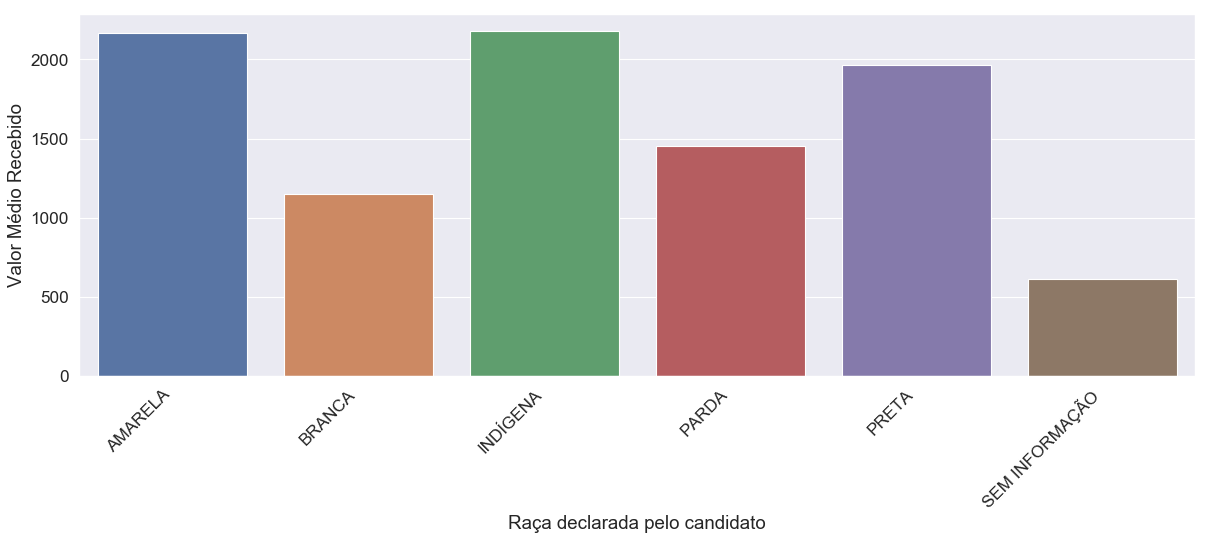

In [474]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

sns.set(style='darkgrid')
sns.set_palette("rocket")
sns.set(font_scale = 1.4)
dados = df_demografia[['DS_COR_RACA', 'vl_fundo_especial']].groupby(['DS_COR_RACA']).mean().reset_index()
dados.columns = ['Raça declarada pelo candidato', 'Valor Médio Recebido']
ax = sns.barplot(x= 'Raça declarada pelo candidato', y= 'Valor Médio Recebido', data=dados)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [503]:
## Gênero
df_demografia[['DS_GENERO', 'vl_fundo_especial']].groupby(['DS_GENERO']).mean()

,vl_fundo_especial
DS_GENERO,
FEMININO,1719.204121
MASCULINO,1163.512897


In [501]:
df_demografia[['DS_GENERO', 'vl_fundo_especial']].groupby(['DS_GENERO']).mean()['vl_fundo_especial'][0]/\
df_demografia[['DS_GENERO', 'vl_fundo_especial']].groupby(['DS_GENERO']).mean()['vl_fundo_especial'][1]

1.47759782149201

[Text(0, 0, 'FEMININO'), Text(0, 0, 'MASCULINO')]

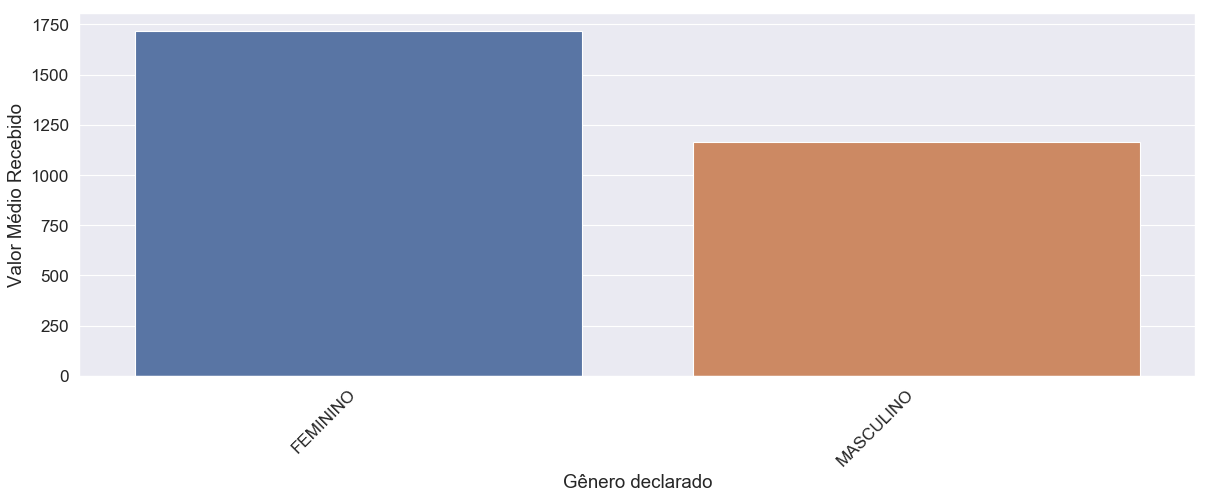

In [476]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

sns.set(style='darkgrid')
sns.set_palette("rocket")
sns.set(font_scale = 1.4)
dados = df_demografia[['DS_GENERO', 'vl_fundo_especial']].groupby(['DS_GENERO']).mean().reset_index()
dados.columns = ['Gênero declarado', 'Valor Médio Recebido']
ax = sns.barplot(x= 'Gênero declarado', y= 'Valor Médio Recebido', data=dados)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [477]:
## DS_GRAU_INSTRUCAO
df_demografia[['DS_GRAU_INSTRUCAO', 'vl_fundo_especial']].groupby(['DS_GRAU_INSTRUCAO']).mean()

,vl_fundo_especial
DS_GRAU_INSTRUCAO,
ANALFABETO,0.000000
ENSINO FUNDAMENTAL COMPLETO,680.694868
ENSINO FUNDAMENTAL INCOMPLETO,591.361789
ENSINO MÉDIO COMPLETO,1092.942844
ENSINO MÉDIO INCOMPLETO,850.888478
LÊ E ESCREVE,728.986656
SUPERIOR COMPLETO,2302.895957
SUPERIOR INCOMPLETO,2432.057357


[Text(0, 0, 'ENSINO FUNDAMENTAL COMPLETO'),
 Text(0, 0, 'ENSINO FUNDAMENTAL INCOMPLETO'),
 Text(0, 0, 'ENSINO MÉDIO COMPLETO'),
 Text(0, 0, 'ENSINO MÉDIO INCOMPLETO'),
 Text(0, 0, 'LÊ E ESCREVE'),
 Text(0, 0, 'SUPERIOR COMPLETO'),
 Text(0, 0, 'SUPERIOR INCOMPLETO')]

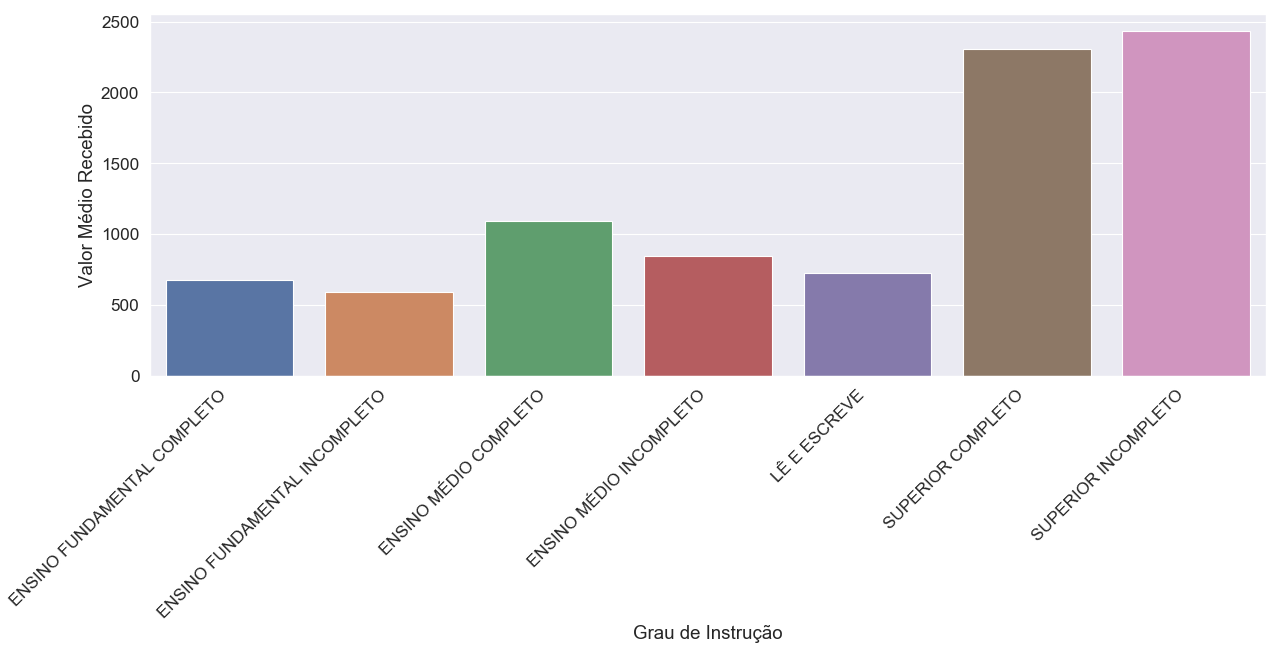

In [497]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

sns.set(style='darkgrid')
sns.set_palette("rocket")
sns.set(font_scale = 1.4)
dados = df_demografia[df_demografia['DS_GRAU_INSTRUCAO'] != 'ANALFABETO'][['DS_GRAU_INSTRUCAO', 'vl_fundo_especial']].groupby(['DS_GRAU_INSTRUCAO']).mean().reset_index()
dados.columns = ['Grau de Instrução', 'Valor Médio Recebido']
ax = sns.barplot(x= 'Grau de Instrução', y= 'Valor Médio Recebido', data=dados)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [479]:
## faixa_bens
df_demografia[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()

,vl_fundo_especial
faixa_bens,
1. Menos do que R$ 1000,1425.337390
"2. Menos do que R$ 10.000,00",852.480758
"3. Menos do que R$ 100.000,00",1099.165700
"4. Menos do que R$ 1.000.000,00",1410.018090
"5. Mais do que 1.000.000,00",4171.255362


In [481]:
df_demografia[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()['vl_fundo_especial'][-1]/\
df_demografia[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()['vl_fundo_especial'][0]

2.9265038511152794

[Text(0, 0, '1. Menos do que R$ 1000'),
 Text(0, 0, '2. Menos do que R$ 10.000,00'),
 Text(0, 0, '3. Menos do que R$ 100.000,00'),
 Text(0, 0, '4. Menos do que R$ 1.000.000,00'),
 Text(0, 0, '5. Mais do que 1.000.000,00')]

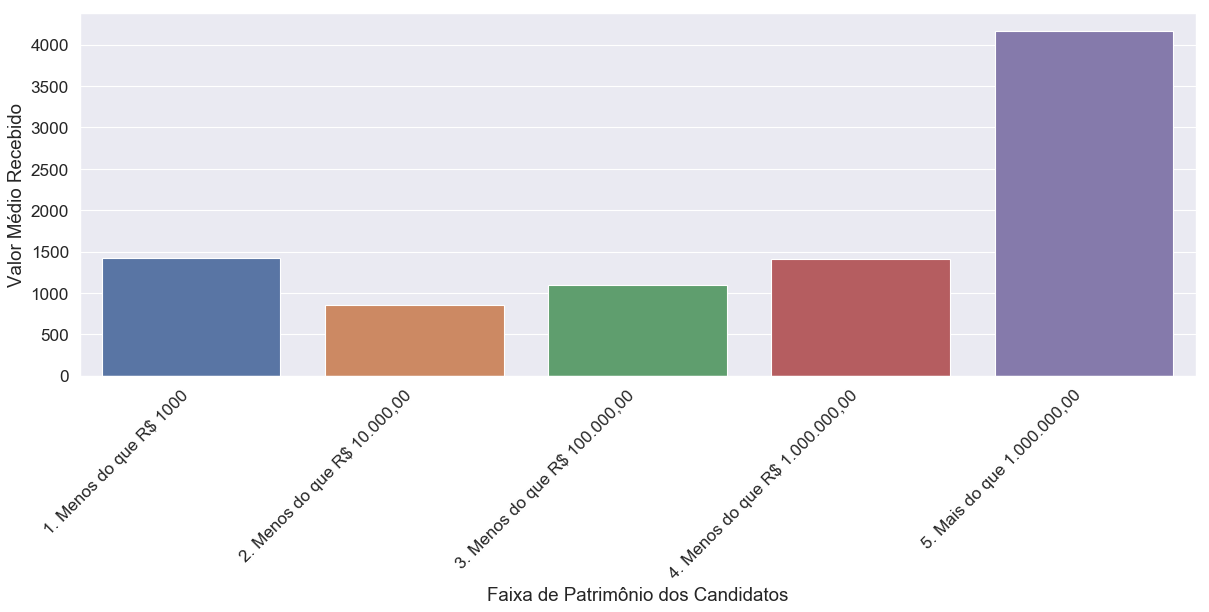

In [482]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

sns.set(style='darkgrid')
sns.set_palette("rocket")
sns.set(font_scale = 1.4)
dados = df_demografia[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean().reset_index()
dados.columns = ['Faixa de Patrimônio dos Candidatos', 'Valor Médio Recebido']
ax = sns.barplot(x="Faixa de Patrimônio dos Candidatos", y="Valor Médio Recebido", data=dados)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [484]:
# Calculando concentração na renda, incluindo prefeitos.
df_demografia_ = df_receitas[['SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO', 'SG_PARTIDO', 'NM_UE', 'SG_UF']].drop_duplicates()\
               .merge(df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Fundo Especial'][['SQ_CANDIDATO', 'VR_RECEITA']].groupby(['SQ_CANDIDATO']).sum().reset_index(), how = 'left', on = 'SQ_CANDIDATO').fillna(0)\
               .merge(df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Fundo Partidario'][['SQ_CANDIDATO', 'VR_RECEITA']].groupby(['SQ_CANDIDATO']).sum().reset_index(), how = 'left', on = 'SQ_CANDIDATO').fillna(0)\
               .merge(df_receitas[df_receitas['DS_FONTE_RECEITA'] == 'Outros Recursos'][['SQ_CANDIDATO', 'VR_RECEITA']].groupby(['SQ_CANDIDATO']).sum().reset_index(), how = 'left', on = 'SQ_CANDIDATO').fillna(0)

df_demografia_.columns = ['SQ_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO', 'SG_PARTIDO', 'NM_UE', 'SG_UF', 'vl_fundo_especial', 'vl_fundo_partidario', 'vl_outros']
df_demografia_['total_fundos_publicos'] = df_demografia_['vl_fundo_especial'] + df_demografia_['vl_fundo_partidario']
print(len(df_demografia_))


295329


In [485]:
df_demografia_ = df_demografia_.merge(df_cadastro[['SQ_CANDIDATO', 'ST_REELEICAO', 'DS_COR_RACA', 'DS_GENERO', 'DS_GRAU_INSTRUCAO']], how = 'inner', on = 'SQ_CANDIDATO')\
                             .merge(df_bens_agregado, how = 'left', on = 'SQ_CANDIDATO').fillna({'VR_BEM_CANDIDATO': 0, 'faixa_bens': '1. Menos do que R$ 1000'})


In [489]:
df_demografia_[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()

,vl_fundo_especial
faixa_bens,
1. Menos do que R$ 1000,1946.273087
"2. Menos do que R$ 10.000,00",1165.789468
"3. Menos do que R$ 100.000,00",2244.243765
"4. Menos do que R$ 1.000.000,00",6874.373811
"5. Mais do que 1.000.000,00",30452.880321


In [488]:
df_demografia_[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()['vl_fundo_especial'][-1]/\
df_demografia_[['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()['vl_fundo_especial'][0]

15.646766390724535

### 3. Calculando o indicador de concentração (por faixa de renda) por partido

In [490]:
lista_partidos = [k for k in list(set(df_demografia['SG_PARTIDO'])) if k != 'NOVO']
lista_indicadores = []

for partido in lista_partidos:

    df_temp = df_demografia[df_demografia['SG_PARTIDO'] == partido][['faixa_bens', 'vl_fundo_especial']].groupby(['faixa_bens']).mean()
    indicador = df_temp['vl_fundo_especial'][-1]/df_temp['vl_fundo_especial'][0]

    lista_indicadores.append(indicador)
    
    print(partido)


PMB
PROS
DEM
PC do B
PSOL
DC
SOLIDARIEDADE
PSC
PSB
PDT
PRTB
PTB
PTC
PP
CIDADANIA
PV
PMN
PSD
REPUBLICANOS
REDE
PCO
PODE
PCB
PT
PSL
PSDB
UP
PSTU
PL
MDB
PATRIOTA
AVANTE


In [491]:
dict_ = {'Partido': lista_partidos, 'Fator_de_Concentração': lista_indicadores}  
    
df_fator_des = pd.DataFrame(dict_)



In [492]:
lista_principais = df_demografia[['SG_PARTIDO', 'vl_fundo_especial']].groupby('SG_PARTIDO').sum().reset_index()
lista_principais = lista_principais[lista_principais['vl_fundo_especial'] > 1000000]
lista_principais = list(lista_principais['SG_PARTIDO'])
lista_principais

['AVANTE',
 'CIDADANIA',
 'DEM',
 'MDB',
 'PATRIOTA',
 'PC do B',
 'PDT',
 'PL',
 'PMN',
 'PODE',
 'PP',
 'PROS',
 'PSB',
 'PSC',
 'PSD',
 'PSDB',
 'PSL',
 'PSOL',
 'PT',
 'PTB',
 'PTC',
 'PV',
 'REDE',
 'REPUBLICANOS',
 'SOLIDARIEDADE']

In [493]:
def principal(x):
    if x in lista_principais:
        y = 1
    else:
        y = 0
    return y



In [494]:
df_fator_des['principal'] = df_fator_des['Partido'].map(principal)

In [495]:
df_fator_des[df_fator_des['principal'] == 1].sort_values('Fator_de_Concentração', ascending = 0)

,Partido,Fator_de_Concentração,principal
2,DEM,15.623719,1
12,PTC,9.294687,1
28,PL,5.921701,1
15,PV,4.732341,1
8,PSB,4.591034,1
4,PSOL,3.521888,1
16,PMN,3.430552,1
7,PSC,3.189696,1
21,PODE,3.089334,1
31,AVANTE,2.927847,1


[Text(0, 0, 'DEM'),
 Text(0, 0, 'PTC'),
 Text(0, 0, 'PL'),
 Text(0, 0, 'PV'),
 Text(0, 0, 'PSB'),
 Text(0, 0, 'PSOL'),
 Text(0, 0, 'PMN'),
 Text(0, 0, 'PSC'),
 Text(0, 0, 'PODE'),
 Text(0, 0, 'AVANTE'),
 Text(0, 0, 'PROS'),
 Text(0, 0, 'PSD'),
 Text(0, 0, 'SOLIDARIEDADE'),
 Text(0, 0, 'PT'),
 Text(0, 0, 'PSDB'),
 Text(0, 0, 'PP'),
 Text(0, 0, 'REDE'),
 Text(0, 0, 'CIDADANIA'),
 Text(0, 0, 'PC do B'),
 Text(0, 0, 'MDB'),
 Text(0, 0, 'PATRIOTA'),
 Text(0, 0, 'PSL'),
 Text(0, 0, 'REPUBLICANOS'),
 Text(0, 0, 'PTB'),
 Text(0, 0, 'PDT')]

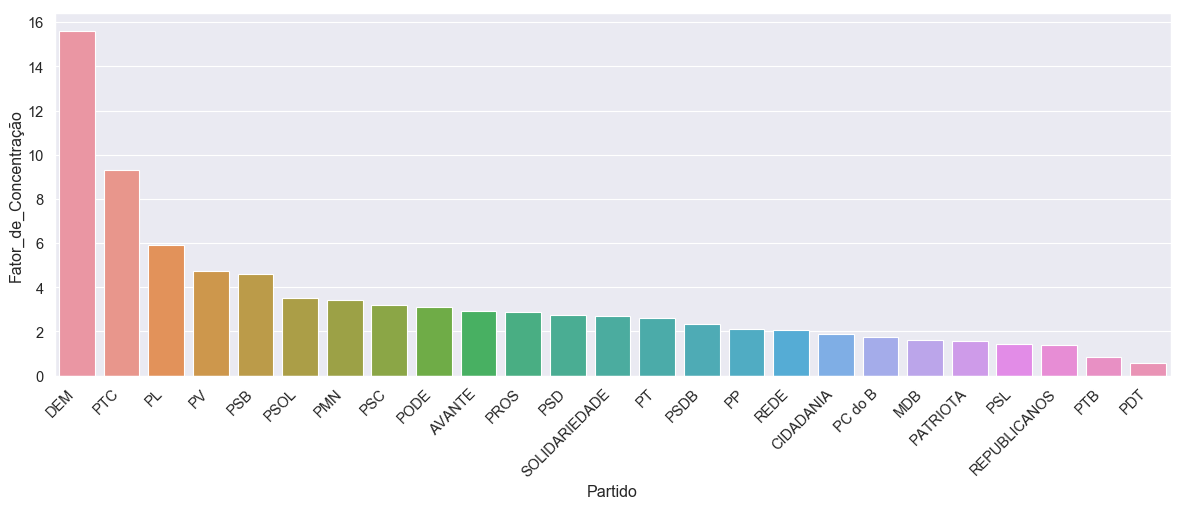

In [496]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

sns.set(style='darkgrid')
sns.set_palette("rocket")
sns.set(font_scale = 1.2)
dados = df_fator_des[df_fator_des['principal'] == 1].sort_values('Fator_de_Concentração', ascending = 0)
ax = sns.barplot(x="Partido", y="Fator_de_Concentração", data=dados)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')